# Lab 01a

## 1 Classification with a single-layer perceptron


#### 1.1 Generation of linearly-separable data

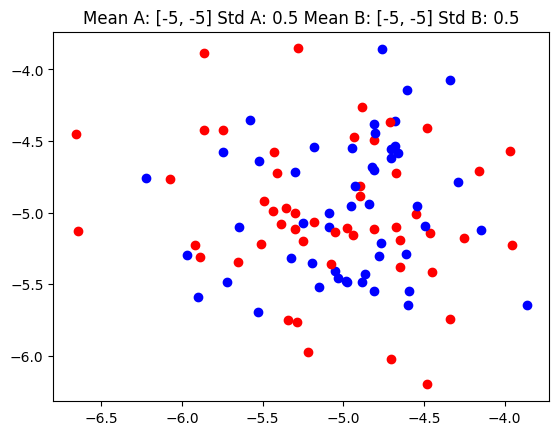

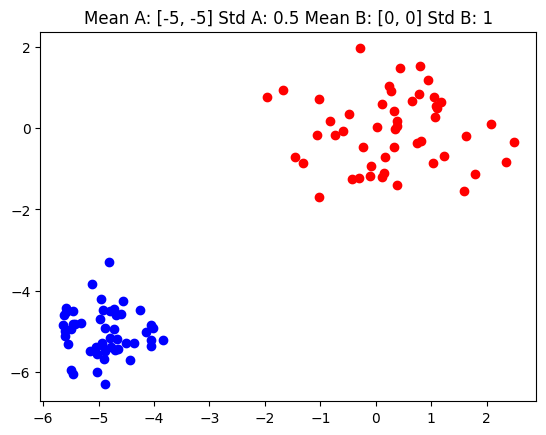

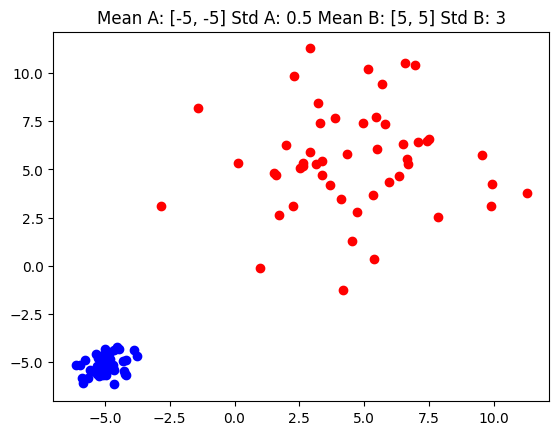

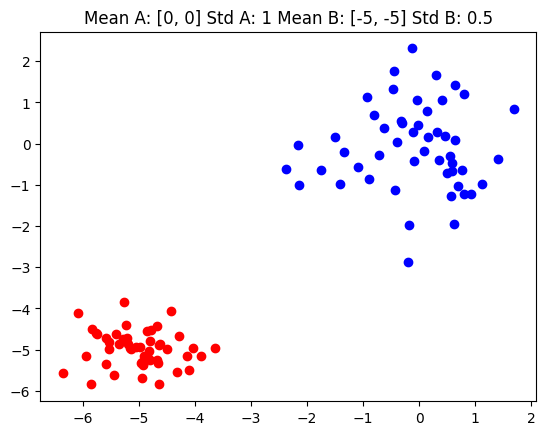

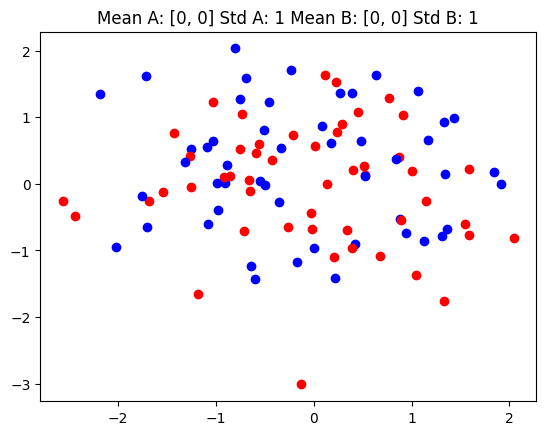

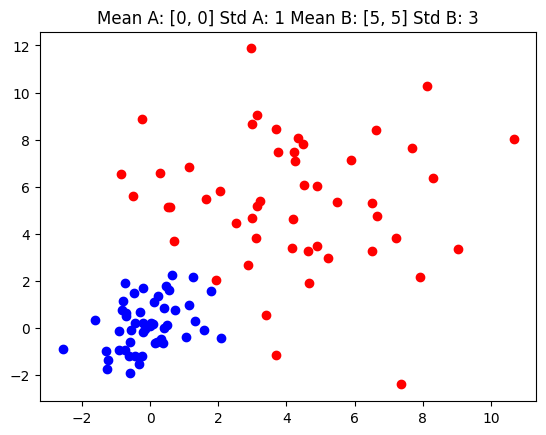

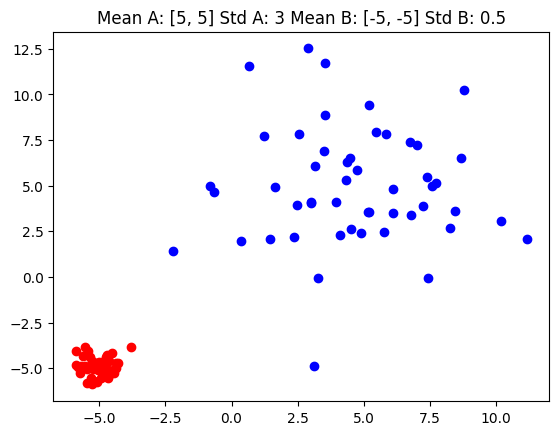

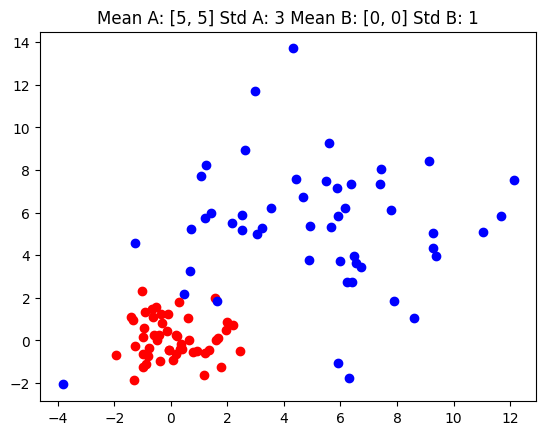

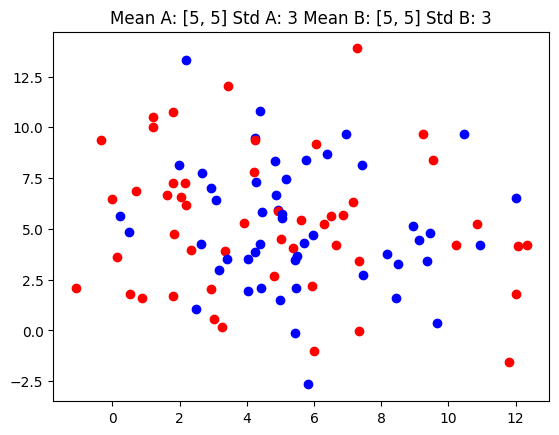

In [1]:
import data_points as dp
import numpy as np

listOfMeans = [[-5, -5], [0, 0], [5, 5]]
listOfStd = [0.5, 1, 3]

for(meanA, stdA) in zip(listOfMeans, listOfStd):
    for(meanB, stdB) in zip(listOfMeans, listOfStd):
        points1 = dp.generate_points_normal(50, meanA, stdA, 0)
        points2= dp.generate_points_normal(50, meanB, stdB, 1)

        points = points1 + points2

        points_shuffled = dp.shuffle_points(points)
        title = "Mean A: " + str(meanA) + " Std A: " + str(stdA) + " Mean B: " + str(meanB) + " Std B: " + str(stdB)
        dp.plot_points_2d(points, title)
    







#### 1.2 Classification with a single-layer perceptron and analysis

#### 1.3 Classification of samples that are not linearly separable

We will have 3 sets, one that has only few points that are not linearly separable, one that has more points that are not linearly separable and one that has a lot of points that are not linearly separable.

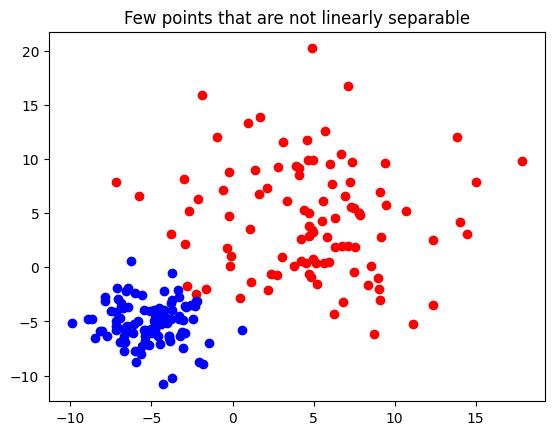

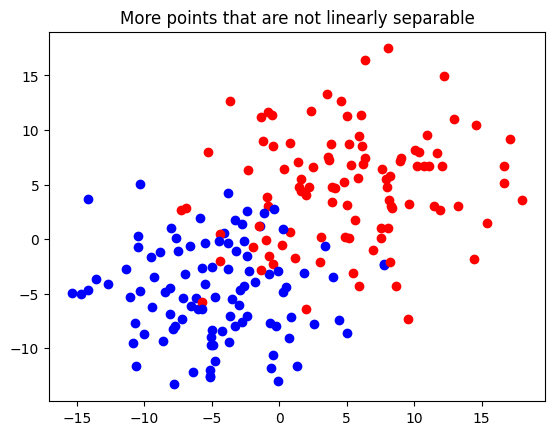

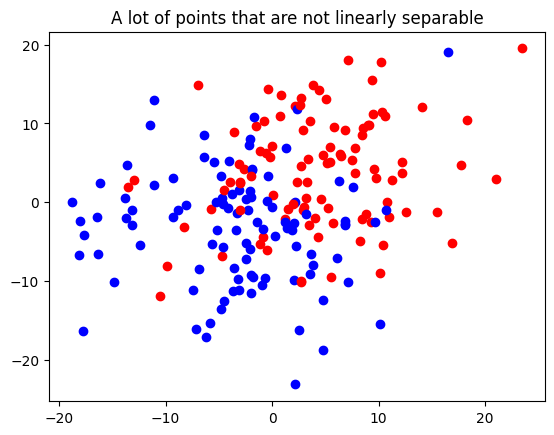

In [2]:
import data_points as dp
import numpy as np

# Configuration for different point sets
configurations = [
    ([-5, -5], [5, 5], 2, 5, 100, "Few points that are not linearly separable"),
    ([-5, -5], [5, 5], 5, 5, 100, "More points that are not linearly separable"),
    ([-3, -3], [3, 3], 7, 7, 100, "A lot of points that are not linearly separable")
]

# Loop through configurations to generate, shuffle, and plot points
for meanA, meanB, stdA, stdB, n_points, plot_title in configurations:
    pointsA = dp.generate_points_normal(n_points, meanA, stdA, 0)
    pointsB = dp.generate_points_normal(n_points, meanB, stdB, 1)
    points = pointsA + pointsB
    points_shuffled = dp.shuffle_points(points)
    dp.plot_points_2d(points_shuffled, plot_title)


Training of perceptron for the different point sets

Epoch 0, Loss: -6.572358959381977


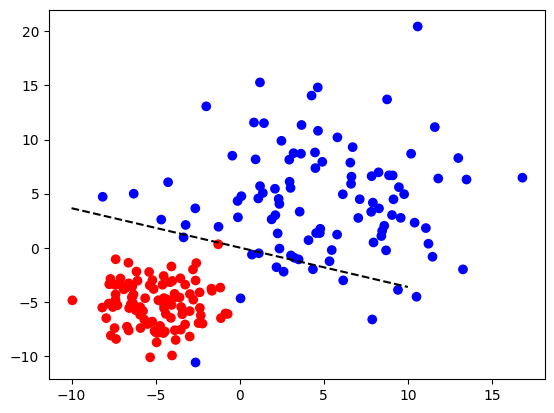

Epoch 1, Loss: -0.11566626488678365


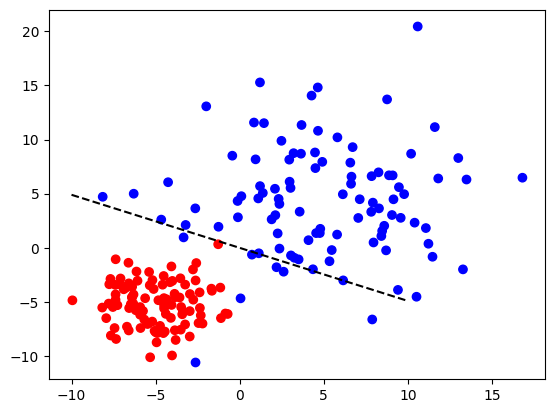

Epoch 2, Loss: 0.11079847731333295


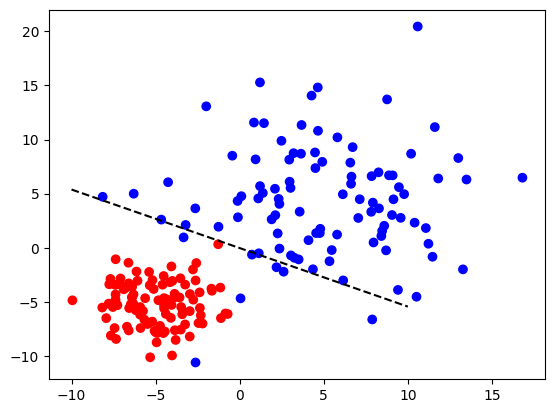

Epoch 3, Loss: 0.11079847731333295


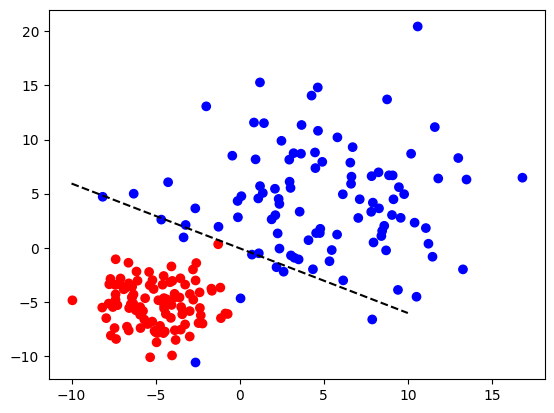

Epoch 4, Loss: 0.14580332916898492


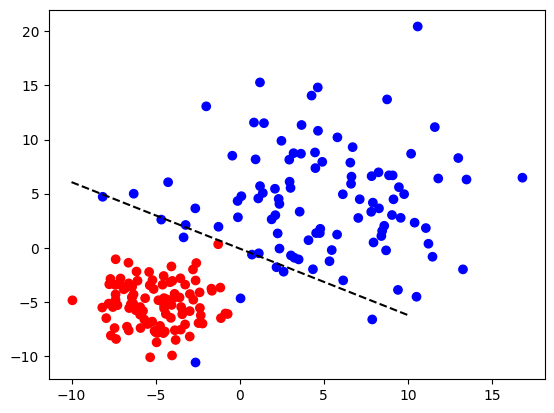

Epoch 5, Loss: 0.14580332916898492


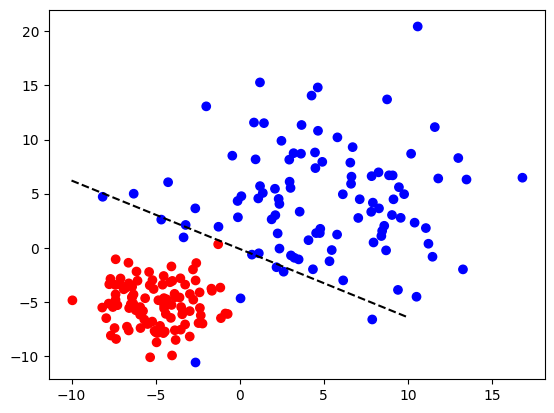

Epoch 6, Loss: 0.14580332916898492


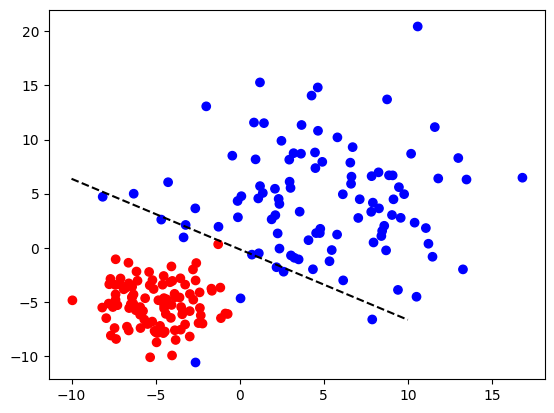

Epoch 7, Loss: 0.14580332916898492


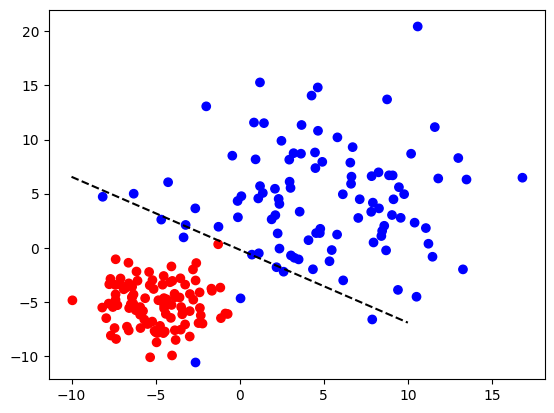

Epoch 8, Loss: 0.15673324604711208


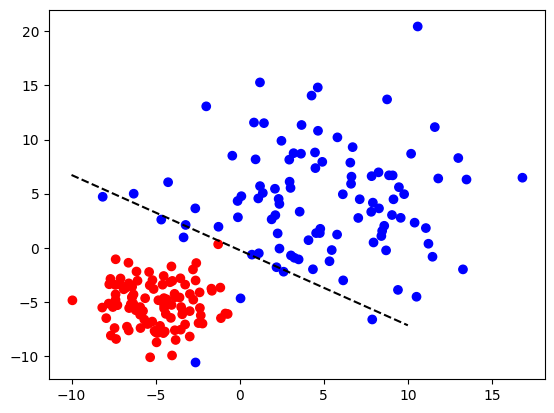

Epoch 9, Loss: 0.15673324604711208


KeyboardInterrupt: 

In [7]:
from lab01a.data_points import generate_points_normal, shuffle_points
import numpy as np
from module import SingleLayerPerceptron

configurations = [
    ([-5, -5], [5, 5], 2, 5, 100, "Few points that are not linearly separable"),
    ([-5, -5], [5, 5], 5, 5, 100, "More points that are not linearly separable"),
    ([-3, -3], [3, 3], 7, 7, 100, "A lot of points that are not linearly separable")
]

# Loop through configurations to generate, shuffle, and plot points
for meanA, meanB, stdA, stdB, n_points, plot_title in configurations:
    pointsA = generate_points_normal(n_points, meanA, stdA, 1)  # Class label 1 for group A
    pointsB = generate_points_normal(n_points, meanB, stdB, 0)  # Class label 0 for group B
    points = pointsA + pointsB

    # Shuffle points and separate them into X and y
    XandY = shuffle_points(points)
    X = np.array([point[0] for point in XandY])
    y = np.array([point[1] for point in XandY])

    # Train Perceptron using the "perceptron" method
    perceptron = SingleLayerPerceptron(2)
    perceptron.train(X, y, lr=0.01, method="perceptron", epochs=100, visualize=True)
